# **Limpieza de Datos**
En este notebook, se realiza la limpieza del dataset [Global Air Pollution][kaggle]


[kaggle]: https://www.kaggle.com/datasets/hasibalmuzdadid/global-air-pollution-dataset

### **Objetivos**

1. Identificación de valores nulos
2. Eliminación y/o reemplazo de valores nulos
3. Identificación y eliminación de valores duplicados
4. Generación del nuevo dataset tratado

### Importar librerías 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Cargando el Dataset

In [12]:
df = pd.read_csv("../data/global_air_pollution.csv")

### Búsqueda de valores NaN
A continuación se presenta la cantidad de valores nulos por cada columna.

In [4]:
df.isna().sum()

Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

Solamente dos variables del dataset presentan valores nulos:
- La variable `Country` presenta 427.
- La variable `City` presenta 1.

In [5]:
porcentaje_nulos_country = (df['Country'].isna().sum() / len(df)) * 100
print(f"Porcentaje de valores nulos en Country: {porcentaje_nulos_country:.3f} %")

porcentaje_nulos_city = (df['City'].isna().sum() / len(df)) * 100
print(f"Porcentaje de valores nulos en City: {porcentaje_nulos_city:.3f} %")

Porcentaje de valores nulos en Country: 1.820 %
Porcentaje de valores nulos en City: 0.004 %


Estos resultados sugieren que hay una cantidad mínima de valores nulos en la columna "City" (apenas el 0.004%), mientras que la columna "Country" tiene un porcentaje algo mayor pero todavía bajo, con 1.82%. Esto indica que el dataset está mayormente completo y no habrá preocupación por la eliminación de datos, al menos en estas columnas.

In [6]:
# Eliminar la columna Country
df.drop('Country', axis=1, inplace=True)

# Reemplazar el valor nulo de City, por la media
df.fillna({'City': df['City'].mode()[0]}, inplace=True)

# Imprimir la información
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   City                23463 non-null  object
 1   AQI Value           23463 non-null  int64 
 2   AQI Category        23463 non-null  object
 3   CO AQI Value        23463 non-null  int64 
 4   CO AQI Category     23463 non-null  object
 5   Ozone AQI Value     23463 non-null  int64 
 6   Ozone AQI Category  23463 non-null  object
 7   NO2 AQI Value       23463 non-null  int64 
 8   NO2 AQI Category    23463 non-null  object
 9   PM2.5 AQI Value     23463 non-null  int64 
 10  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(6)
memory usage: 2.0+ MB


### Búsqueda de valores Duplicados
Se procede a identificar y eliminar las filas duplicadas para asegurar que cada registro en el dataset sea único y evitar algún tipo de sesgo.

In [7]:
print(f'Cantidad de filas duplicadas: {df.duplicated().sum()}')

Cantidad de filas duplicadas: 0


### Búsqueda de valores atípicos
Estos valores que se alejan significativamente del resto de datos, pueden ser errores de digitación, casos extremos o simplemente datos raros pero válidos.

Se implementa la visualización de los datos mediante Boxplot, para encontrar valores atípicos. 

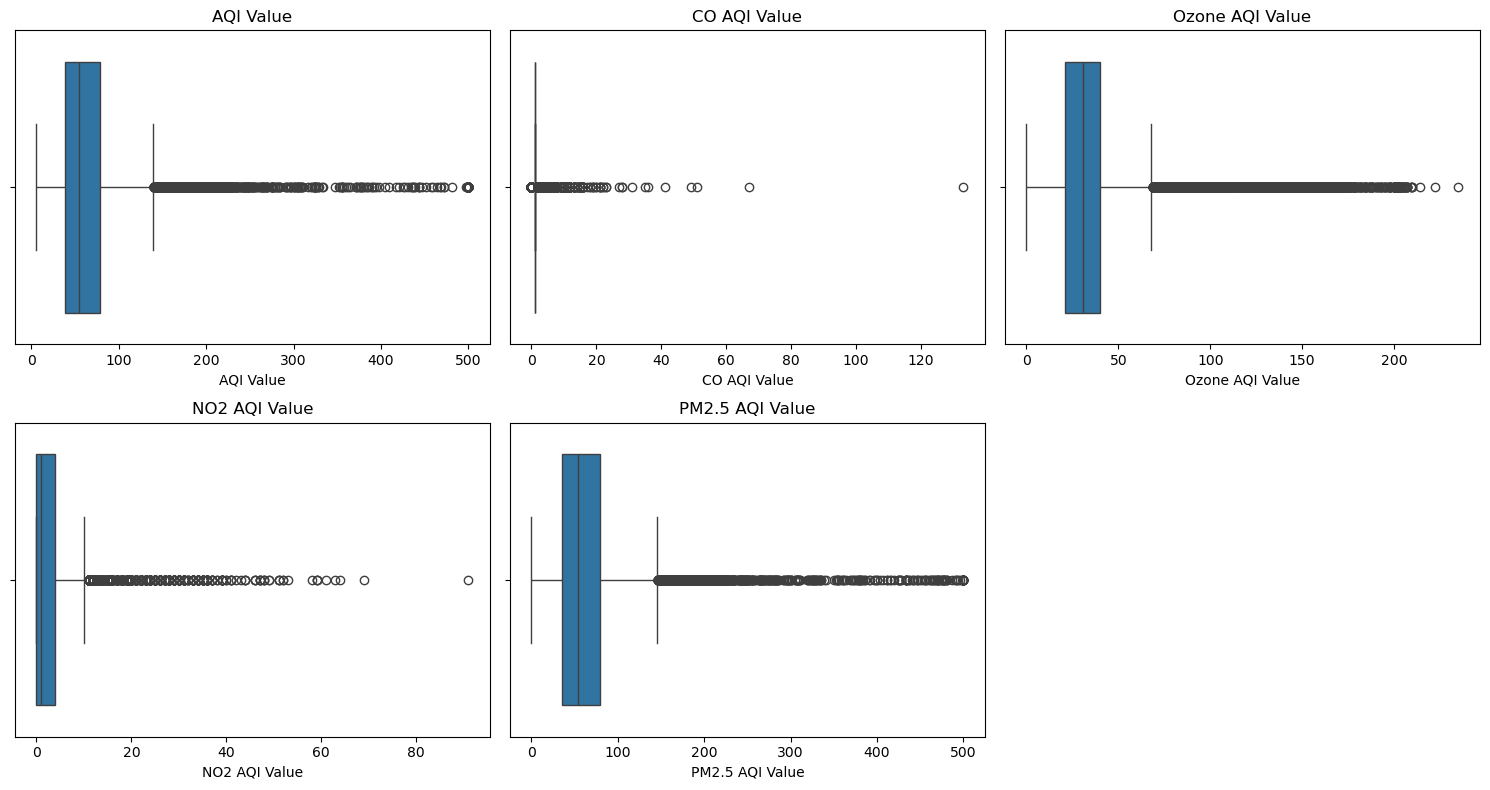

In [13]:
# Seleccionamos solo columnas numéricas
numericas = df.select_dtypes(include=["int64", "float64"])

# Creamos Boxplots para cada uno
plt.figure(figsize=(15, 8))  # Cambia los números para ajustar ancho y alto
for i, col in enumerate(numericas.columns, 1):
    plt.subplot(2, len(numericas.columns)//2 +1, i)
    sns.boxplot(x=df[col])
    plt.title(col)

# Mostrar el gráfico
plt.tight_layout() # evita que los gráficos se solapen, asegurando que se visualicen correctamente.
plt.show()

La mayoría de los valores de AQI se encuentran dentro de rangos bajos, lo que sugiere que, en condiciones normales, la calidad del aire es adecuada. No obstante, se han identificado valores atípicos significativos, que reflejan episodios de contaminación extrema. Por esta razón, se conservarán estos valores atípicos, ya que permiten evaluar los eventos de contaminación más severos en la zona y comprender mejor sus posibles causas e impactos.

### Normalización de Texto
Se pretende eliminar espacios al principio y final de los valores de la columna `City` y dejar el texto uniforme

In [14]:
df['City'] = df['City'].str.strip()

#### Dataset limpio

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


### Generación del Dataset Limpio

In [16]:
df.to_csv('../data/dataset_clean.csv', index=False)